In [32]:
import mediapipe as mp
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

# landmark

In [3]:
landmark_names = [
        'nose',
        'left_eye_inner',
        'left_eye',
        'left_eye_outer',
        'right_eye_inner',
        'right_eye',
        'right_eye_outer',
        'left_ear',
        'right_ear',
        'mouth_left',
        'mouth_right',
        'left_shoulder',
        'right_shoulder',
        'left_elbow',
        'right_elbow',
        'left_wrist', 'right_wrist',
        'left_pinky_1', 'right_pinky_1',
        'left_index_1', 'right_index_1',
        'left_thumb_2', 'right_thumb_2',
        'left_hip', 'right_hip',
        'left_knee', 'right_knee',
        'left_ankle', 'right_ankle',
        'left_heel', 'right_heel',
        'left_foot_index', 'right_foot_index',
    ]
landmark_list = []
for i in landmark_names:
    for j in ["_x", "_y", "_z"]:
        landmark_list.append(i + j)

In [4]:
results_points = []
#영상
cap = cv2.VideoCapture("walk_side.mp4")
with mp_pose.Pose(
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            # print("카메라를 찾을 수 없습니다.")
            break

        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = pose.process(image)
        points = []
        for i in range(len(landmark_names)):
            points.append(results.pose_world_landmarks.landmark[i].x)
            points.append(results.pose_world_landmarks.landmark[i].y)
            points.append(results.pose_world_landmarks.landmark[i].z)
        results_points.append(points)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
        cv2.imshow('MediaPipe Pose', cv2.flip(image, 1))
        if cv2.waitKey(5) & 0xFF == 27:
            break
cv2.destroyAllWindows
cap.release()

In [5]:
print(results_points)

[[0.18957307934761047, -0.5970683097839355, -0.16322475671768188, 0.16499194502830505, -0.6419872641563416, -0.15332522988319397, 0.16539566218852997, -0.6421018242835999, -0.15259486436843872, 0.165287584066391, -0.6429299116134644, -0.1525120586156845, 0.1608230471611023, -0.633557915687561, -0.18632619082927704, 0.16161583364009857, -0.6346294283866882, -0.1870259940624237, 0.16147741675376892, -0.6358428001403809, -0.18632780015468597, 0.056658219546079636, -0.6491444110870361, -0.07570759207010269, 0.0369471050798893, -0.6209306120872498, -0.2366228997707367, 0.15076343715190887, -0.5781503319740295, -0.13184571266174316, 0.14504756033420563, -0.5691457390785217, -0.17626814544200897, 0.05257982388138771, -0.4624529480934143, 0.03755003586411476, -0.050357647240161896, -0.4482595920562744, -0.26984480023384094, 0.05323678255081177, -0.2227257788181305, 0.08298424631357193, -0.15073220431804657, -0.19397400319576263, -0.30739980936050415, 0.22128140926361084, -0.04707162827253342, 

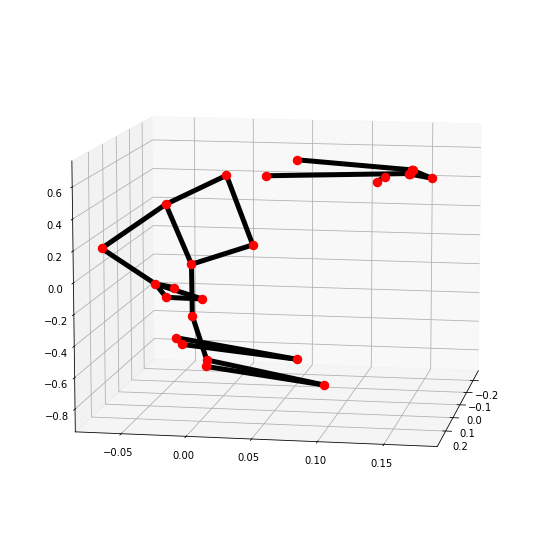

In [6]:
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [7]:
point_dataframe = pd.DataFrame(columns = landmark_list, data = results_points)

In [8]:
point_dataframe

,nose_x,nose_y,nose_z,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_x,left_eye_y,left_eye_z,left_eye_outer_x,...,left_heel_z,right_heel_x,right_heel_y,right_heel_z,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z
0,0.189573,-0.597068,-0.163225,0.164992,-0.641987,-0.153325,0.165396,-0.642102,-0.152595,0.165288,...,0.219943,-0.074937,0.806014,0.040866,0.054205,0.828724,0.167491,0.042717,0.835529,-0.055435
1,0.193588,-0.603334,-0.149474,0.167534,-0.646749,-0.137942,0.167917,-0.646882,-0.137253,0.167712,...,0.205442,-0.085021,0.802507,0.035435,0.042096,0.823012,0.151791,0.023676,0.831995,-0.059656
2,0.211302,-0.615537,-0.139884,0.186049,-0.658645,-0.128379,0.186389,-0.658804,-0.127688,0.186094,...,0.213280,-0.098092,0.792451,0.047457,0.034728,0.805992,0.166923,0.011385,0.824457,-0.049063
3,0.217025,-0.623345,-0.139500,0.192396,-0.666512,-0.128613,0.192676,-0.666626,-0.127903,0.192430,...,0.213796,-0.129218,0.782278,0.070536,0.084782,0.796275,0.167291,-0.022285,0.816900,-0.034294
4,0.217587,-0.621558,-0.133263,0.193579,-0.664917,-0.123402,0.193843,-0.665022,-0.122657,0.193650,...,0.213007,-0.149983,0.771653,0.102458,0.119917,0.781949,0.166544,-0.048812,0.805134,0.001875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.172675,-0.603860,-0.098230,0.157629,-0.645690,-0.085949,0.157888,-0.645668,-0.085247,0.157707,...,0.252255,-0.020252,0.797077,0.084293,0.047086,0.842310,0.200128,0.080760,0.829856,0.010952
135,0.172800,-0.604111,-0.100596,0.157548,-0.645890,-0.088546,0.157805,-0.645877,-0.087849,0.157620,...,0.253856,-0.019843,0.797681,0.083454,0.046662,0.837415,0.203124,0.081989,0.829422,0.009869
136,0.172851,-0.603654,-0.103807,0.157453,-0.645369,-0.092017,0.157710,-0.645374,-0.091318,0.157522,...,0.252636,-0.020226,0.800890,0.083016,0.044516,0.837369,0.202032,0.082571,0.832004,0.007272
137,0.172274,-0.601551,-0.108398,0.156698,-0.643332,-0.096937,0.156964,-0.643359,-0.096241,0.156786,...,0.249989,-0.020457,0.802043,0.076922,0.044526,0.836991,0.199022,0.083109,0.832080,-0.003527


In [9]:
point_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 99 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nose_x              139 non-null    float64
 1   nose_y              139 non-null    float64
 2   nose_z              139 non-null    float64
 3   left_eye_inner_x    139 non-null    float64
 4   left_eye_inner_y    139 non-null    float64
 5   left_eye_inner_z    139 non-null    float64
 6   left_eye_x          139 non-null    float64
 7   left_eye_y          139 non-null    float64
 8   left_eye_z          139 non-null    float64
 9   left_eye_outer_x    139 non-null    float64
 10  left_eye_outer_y    139 non-null    float64
 11  left_eye_outer_z    139 non-null    float64
 12  right_eye_inner_x   139 non-null    float64
 13  right_eye_inner_y   139 non-null    float64
 14  right_eye_inner_z   139 non-null    float64
 15  right_eye_x         139 non-null    float64
 16  right_ey

C:\Users\Lee-PC\AppData\Local\Temp\ipykernel_5672\3289821803.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


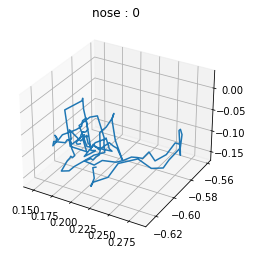

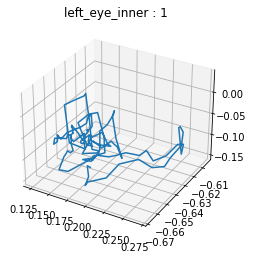

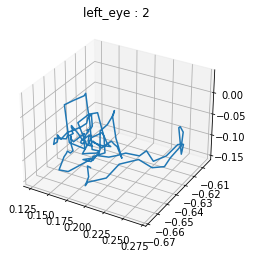

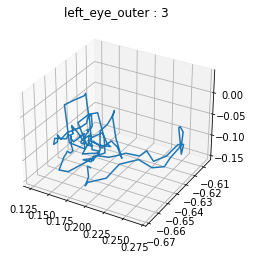

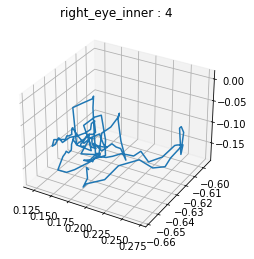

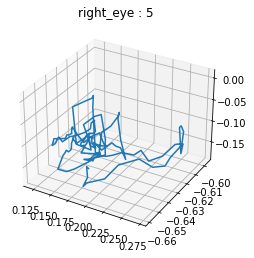

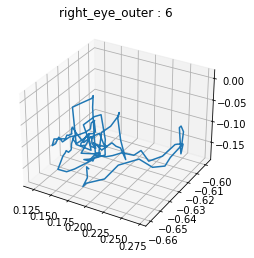

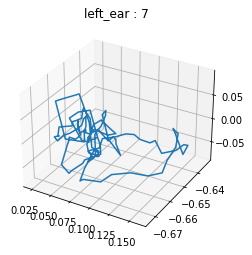

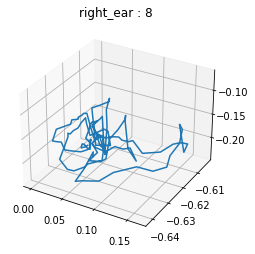

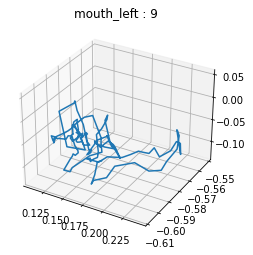

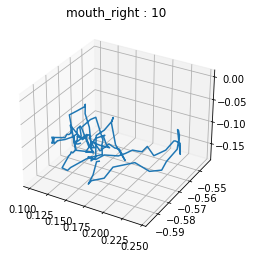

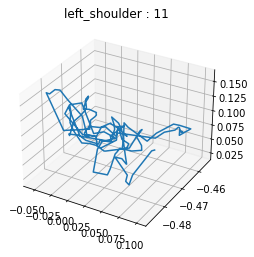

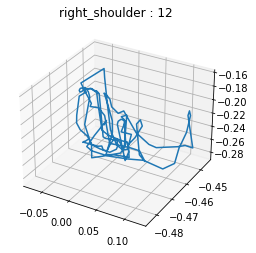

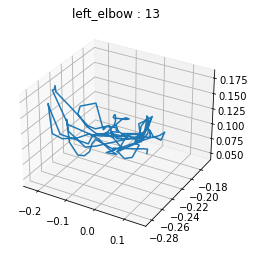

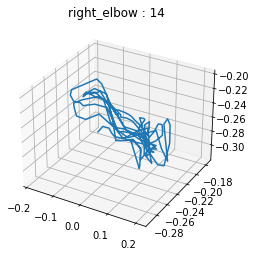

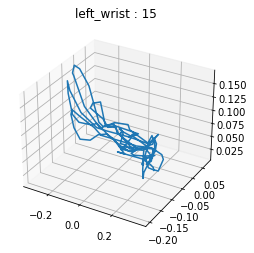

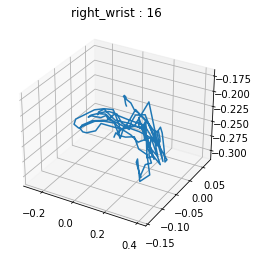

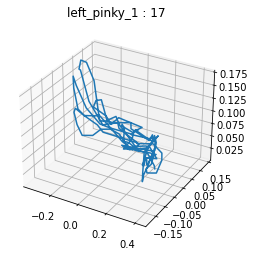

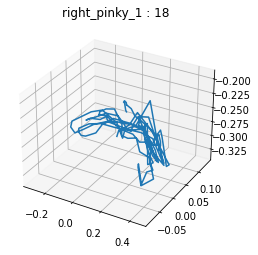

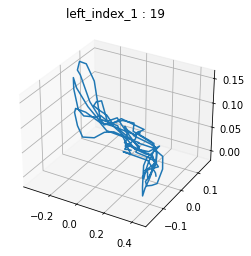

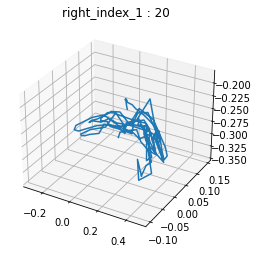

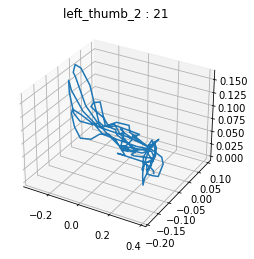

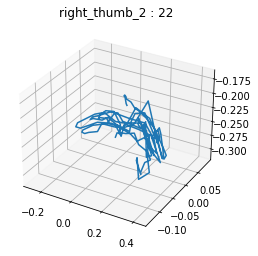

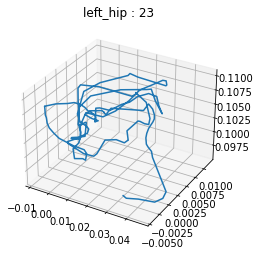

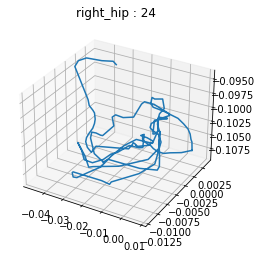

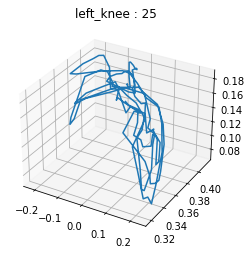

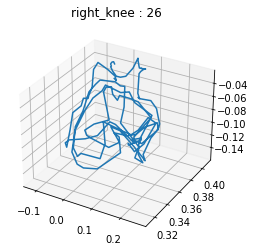

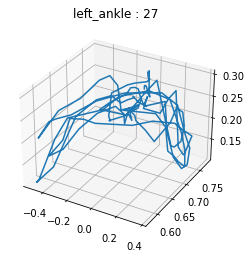

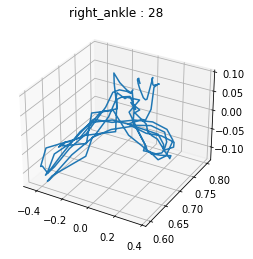

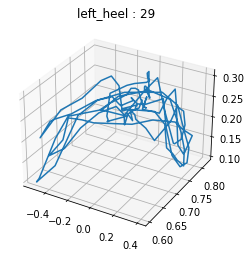

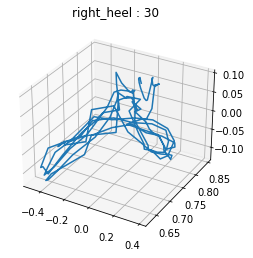

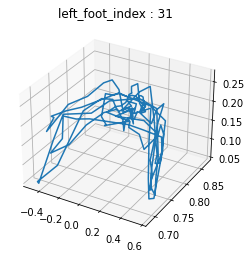

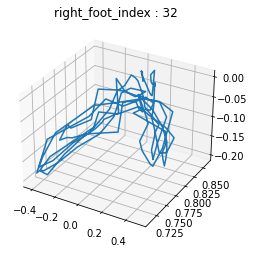

In [10]:
for i in range(len(landmark_names)):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    plt.title(landmark_names[i] + " : " + str(i))
    x = point_dataframe[landmark_list[i*3]]
    y = point_dataframe[landmark_list[i*3+1]]
    z = point_dataframe[landmark_list[i*3+2]]
    ax.plot(x,y,z)

C:\Users\Lee-PC\AppData\Local\Temp\ipykernel_5672\3239042729.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fit = plt.figure()


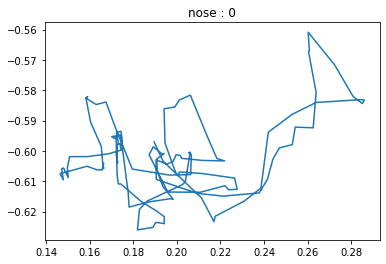

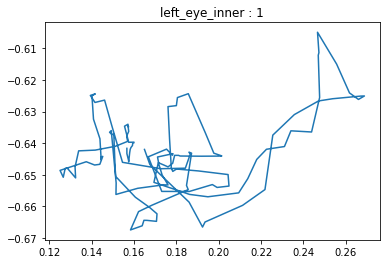

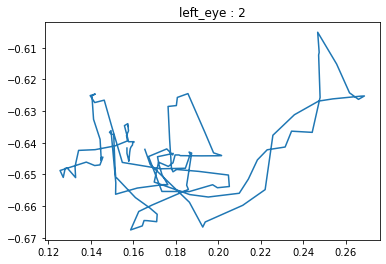

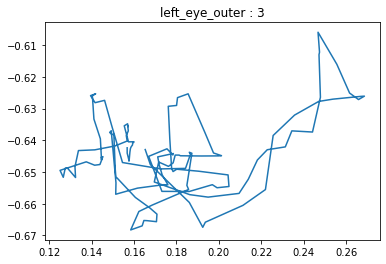

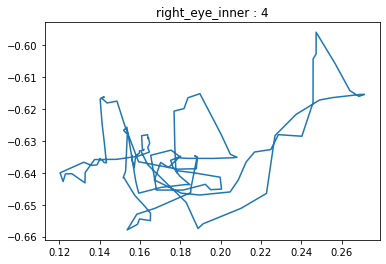

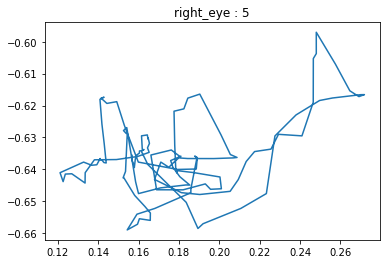

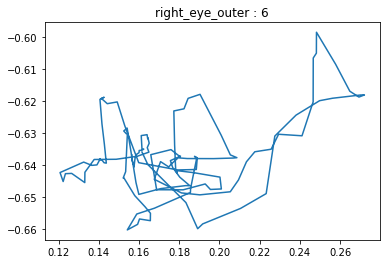

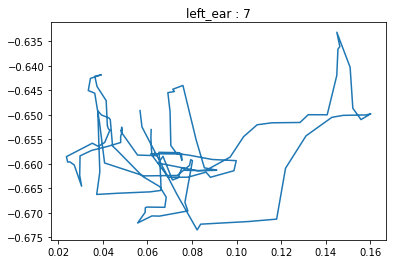

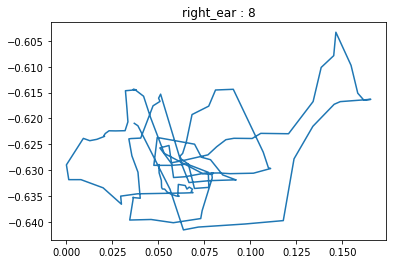

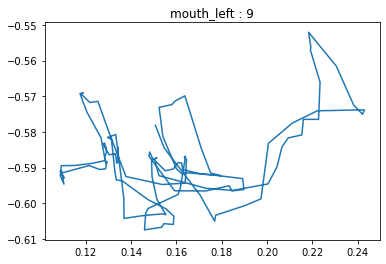

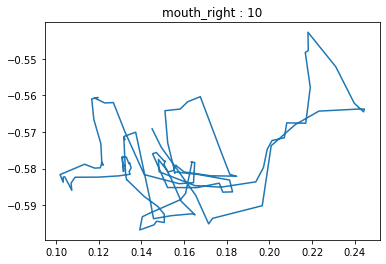

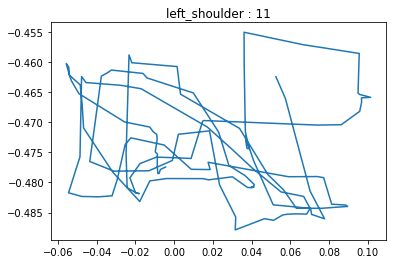

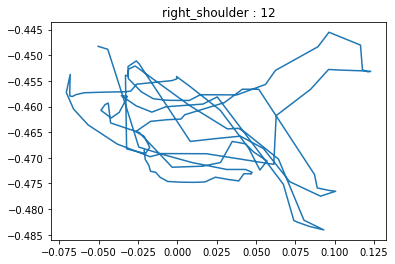

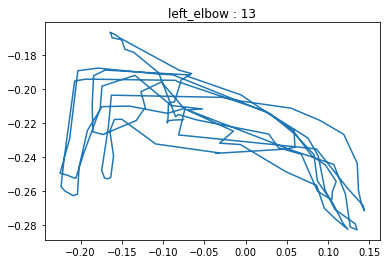

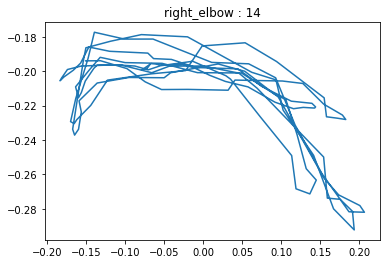

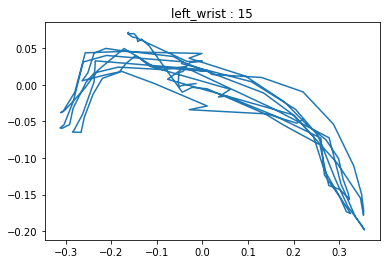

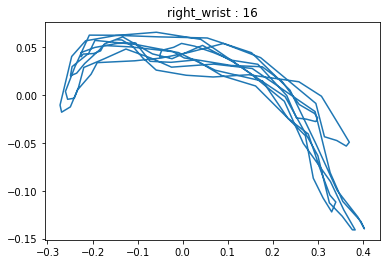

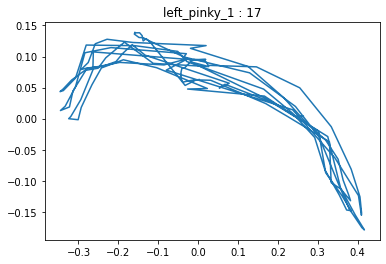

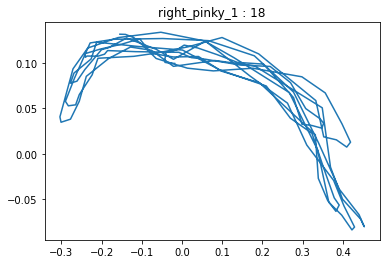

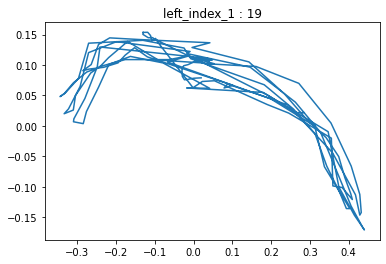

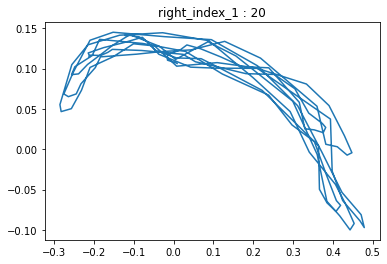

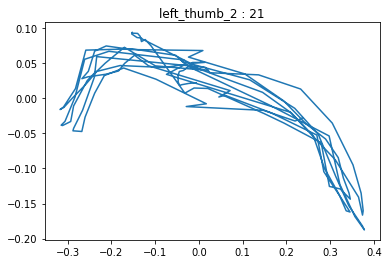

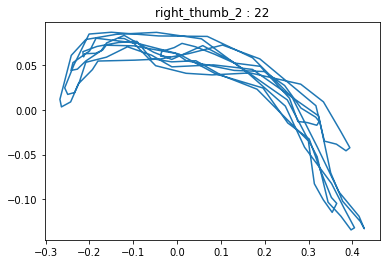

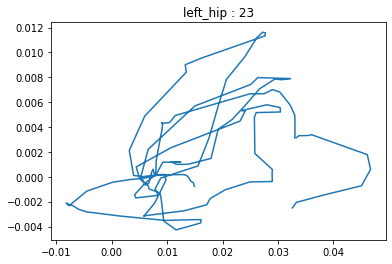

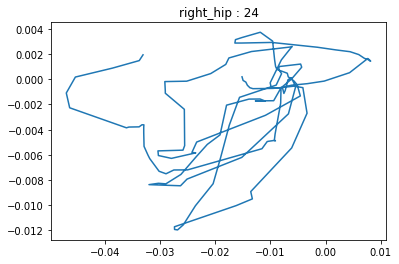

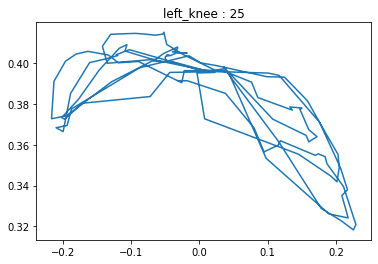

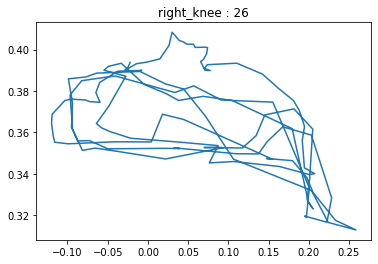

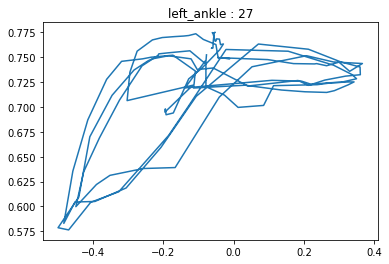

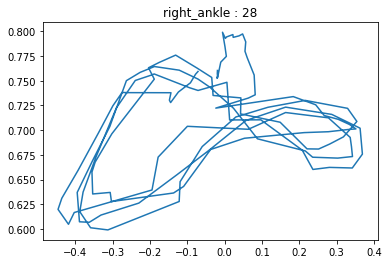

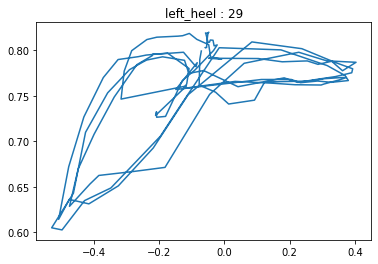

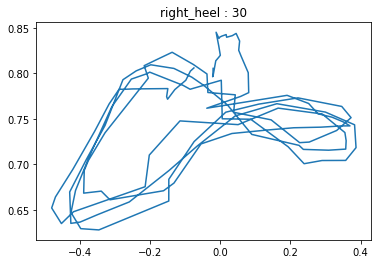

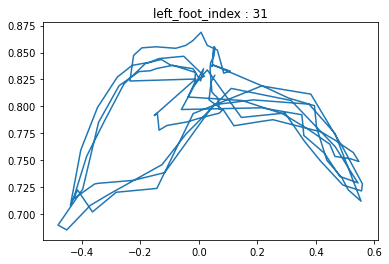

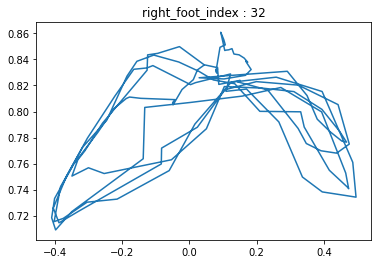

In [11]:
for i in range(len(landmark_names)):
    fit = plt.figure()
    plt.title(landmark_names[i] + " : " + str(i))
    x = point_dataframe[landmark_list[3*i]]
    y = point_dataframe[landmark_list[3*i+1]]
    
    plt.plot(x, y)

In [37]:
usual_point = (11, 12, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32)
usual_list = [
        'left_shoulder',
        'right_shoulder',
        'left_hip', 'right_hip',
        'left_knee', 'right_knee',
        'left_ankle', 'right_ankle',
        'left_heel', 'right_heel',
        'left_foot_index', 'right_foot_index',
    ]
column_list = []
for i in usual_list:
    for j in ["_x", "_y", "_z"]:
        column_list.append(i+j)
    

shorten_points = []
# 프레임 수를 줄임

for i in range(0, len(results_points), 4):
    points = []
    for point in usual_point:
        points.append(results_points[i][point*3 + 0])
        points.append(results_points[i][point*3 + 1])
        points.append(results_points[i][point*3 + 2])
    shorten_points.append(points)

    
shorten_dataframe = pd.DataFrame(columns = column_list, data = shorten_points)
shorten_dataframe.info()

shorten_dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   left_shoulder_x     35 non-null     float64
 1   left_shoulder_y     35 non-null     float64
 2   left_shoulder_z     35 non-null     float64
 3   right_shoulder_x    35 non-null     float64
 4   right_shoulder_y    35 non-null     float64
 5   right_shoulder_z    35 non-null     float64
 6   left_hip_x          35 non-null     float64
 7   left_hip_y          35 non-null     float64
 8   left_hip_z          35 non-null     float64
 9   right_hip_x         35 non-null     float64
 10  right_hip_y         35 non-null     float64
 11  right_hip_z         35 non-null     float64
 12  left_knee_x         35 non-null     float64
 13  left_knee_y         35 non-null     float64
 14  left_knee_z         35 non-null     float64
 15  right_knee_x        35 non-null     float64
 16  right_knee

,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_y,right_shoulder_z,left_hip_x,left_hip_y,left_hip_z,right_hip_x,...,left_heel_z,right_heel_x,right_heel_y,right_heel_z,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z
0,0.052580,-0.462453,0.037550,-0.050358,-0.448260,-0.269845,0.032607,-0.002502,0.096144,-0.033106,...,0.219943,-0.074937,0.806014,0.040866,0.054205,0.828724,0.167491,0.042717,0.835529,-0.055435
1,0.071007,-0.485295,0.057675,-0.011140,-0.469176,-0.257766,0.046707,0.000588,0.095150,-0.047013,...,0.213007,-0.149983,0.771653,0.102458,0.119917,0.781949,0.166544,-0.048812,0.805134,0.001875
2,0.037100,-0.472630,0.037124,0.084669,-0.456624,-0.288875,0.033779,0.003302,0.101293,-0.033814,...,0.250277,-0.273894,0.782544,-0.020930,0.466394,0.768379,0.209271,-0.178611,0.811115,-0.116269
3,0.038195,-0.474356,0.105230,0.122765,-0.453153,-0.206257,0.033073,0.003816,0.104188,-0.032976,...,0.162791,-0.419846,0.694684,-0.093888,0.465075,0.753462,0.122117,-0.345114,0.759407,-0.175226
4,0.036130,-0.455079,0.041251,0.096276,-0.445512,-0.273446,0.030316,0.006822,0.104524,-0.030194,...,0.270848,-0.418112,0.648067,-0.043054,0.147436,0.805437,0.243122,-0.350875,0.722990,-0.104283
5,0.094987,-0.465181,0.085759,0.037818,-0.457728,-0.242445,0.011472,0.004927,0.104997,-0.011548,...,0.190683,0.050972,0.743743,0.006047,-0.051656,0.846500,0.157406,0.157424,0.811849,-0.037411
6,0.096748,-0.465960,0.101534,-0.007939,-0.458746,-0.200644,0.008992,0.004344,0.104375,-0.009106,...,0.262035,0.358852,0.726109,-0.023570,-0.278723,0.827162,0.221086,0.474141,0.740624,-0.097975
7,0.073745,-0.470476,0.088663,-0.031343,-0.452197,-0.226723,0.007934,0.000112,0.106294,-0.008091,...,0.230823,0.224629,0.720977,-0.022535,-0.414551,0.722322,0.195945,0.331274,0.799762,-0.077535
8,0.000988,-0.475899,0.066804,0.021790,-0.466338,-0.261788,0.011691,0.000997,0.107276,-0.011892,...,0.263190,-0.081126,0.795926,0.041677,-0.019299,0.793266,0.236541,0.027556,0.830933,-0.011059
9,-0.019894,-0.481719,0.114876,0.090923,-0.477487,-0.196085,0.021710,0.004595,0.107221,-0.021449,...,0.149814,-0.277121,0.793076,-0.014968,0.558855,0.727930,0.100747,-0.186301,0.827149,-0.104784


In [55]:
#forward, backward trunk lean : 몸통이 뒤로 기우는 현상
point_dict = {}
for i in range(0, len(usual_point)):
    point_dict[usual_list[i]] = i;

def get_vector(point_list, point):
    npreturn = np.array([
        point_list[point*3+0],
        point_list[point*3+1],
        point_list[point*3+2]
    ])
    return npreturn

q = get_vector(shorten_points[0], point_dict["left_hip"])
q


array([ 0.03260667, -0.0025022 ,  0.09614443])

In [57]:
len(shorten_points)

35

In [59]:
def push_hip_angle(i):
    left_sholder = get_vector(shorten_points[i], point_dict["left_shoulder"])
    left_hip = get_vector(shorten_points[i], point_dict["left_hip"])
    left_knee = get_vector(shorten_points[i], point_dict["left_knee"])
    right_sholder = get_vector(shorten_points[i], point_dict["right_shoulder"])
    right_hip = get_vector(shorten_points[i], point_dict["right_hip"])
    right_knee = get_vector(shorten_points[i], point_dict["right_knee"])
    
    shoulder_lvect = np.array(left_sholder - left_hip)
    knee_lvect = np.array(left_knee - left_hip)
    
    shoulder_rvect = np.array(right_sholder - right_hip)
    knee_rvect = np.array(right_knee - right_hip)
    
    ldot = np.dot(shoulder_lvect, knee_lvect)
    rdot = np.dot(shoulder_rvect, knee_rvect)
    
    lcos = ldot / (np.linalg.norm(shoulder_lvect) * np.linalg.norm(knee_lvect))
    rcos = rdot / (np.linalg.norm(shoulder_rvect) * np.linalg.norm(knee_rvect))
    
    left_hip_angle = np.arccos(lcos)
    right_hip_angle = np.arccos(rcos)
    
    shorten_points[i].append(left_hip_angle)
    shorten_points[i].append(right_hip_angle)
    

In [60]:
for i in ['left_hip_angle', 'right_hip_angle']:
    column_list.append(i)

for i in range(0, len(shorten_points)):
    push_hip_angle(i)

In [71]:
print(len(column_list), len(shorten_points[0]))


38 38


In [72]:
fixed_dataset = pd.DataFrame(columns = column_list, data = shorten_points)

fixed_dataset


,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_y,right_shoulder_z,left_hip_x,left_hip_y,left_hip_z,right_hip_x,...,right_heel_y,right_heel_z,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z,left_hip_angle,right_hip_angle
0,0.052580,-0.462453,0.037550,-0.050358,-0.448260,-0.269845,0.032607,-0.002502,0.096144,-0.033106,...,0.806014,0.040866,0.054205,0.828724,0.167491,0.042717,0.835529,-0.055435,3.025420,2.895142
1,0.071007,-0.485295,0.057675,-0.011140,-0.469176,-0.257766,0.046707,0.000588,0.095150,-0.047013,...,0.771653,0.102458,0.119917,0.781949,0.166544,-0.048812,0.805134,0.001875,2.955530,2.981455
2,0.037100,-0.472630,0.037124,0.084669,-0.456624,-0.288875,0.033779,0.003302,0.101293,-0.033814,...,0.782544,-0.020930,0.466394,0.768379,0.209271,-0.178611,0.811115,-0.116269,2.757947,2.797914
3,0.038195,-0.474356,0.105230,0.122765,-0.453153,-0.206257,0.033073,0.003816,0.104188,-0.032976,...,0.694684,-0.093888,0.465075,0.753462,0.122117,-0.345114,0.759407,-0.175226,2.576666,2.864768
4,0.036130,-0.455079,0.041251,0.096276,-0.445512,-0.273446,0.030316,0.006822,0.104524,-0.030194,...,0.648067,-0.043054,0.147436,0.805437,0.243122,-0.350875,0.722990,-0.104283,2.890220,2.679014
5,0.094987,-0.465181,0.085759,0.037818,-0.457728,-0.242445,0.011472,0.004927,0.104997,-0.011548,...,0.743743,0.006047,-0.051656,0.846500,0.157406,0.157424,0.811849,-0.037411,3.041340,2.540923
6,0.096748,-0.465960,0.101534,-0.007939,-0.458746,-0.200644,0.008992,0.004344,0.104375,-0.009106,...,0.726109,-0.023570,-0.278723,0.827162,0.221086,0.474141,0.740624,-0.097975,2.829167,2.563134
7,0.073745,-0.470476,0.088663,-0.031343,-0.452197,-0.226723,0.007934,0.000112,0.106294,-0.008091,...,0.720977,-0.022535,-0.414551,0.722322,0.195945,0.331274,0.799762,-0.077535,2.761176,2.600300
8,0.000988,-0.475899,0.066804,0.021790,-0.466338,-0.261788,0.011691,0.000997,0.107276,-0.011892,...,0.795926,0.041677,-0.019299,0.793266,0.236541,0.027556,0.830933,-0.011059,3.061622,2.905630
9,-0.019894,-0.481719,0.114876,0.090923,-0.477487,-0.196085,0.021710,0.004595,0.107221,-0.021449,...,0.793076,-0.014968,0.558855,0.727930,0.100747,-0.186301,0.827149,-0.104784,2.828348,3.030386


In [89]:
def push_knee_angle(pointlist):
    left_hip = get_vector(pointlist, point_dict["left_hip"])
    left_knee = get_vector(pointlist, point_dict["left_knee"])
    left_ankle = get_vector(pointlist, point_dict["left_ankle"])
    right_hip = get_vector(pointlist, point_dict["right_hip"])
    right_knee = get_vector(pointlist, point_dict["right_knee"])
    right_ankle = get_vector(pointlist, point_dict["right_ankle"])
    
    hip_lvect = np.array(left_hip - left_knee)
    ankle_lvect = np.array(left_ankle - left_knee)
    
    hip_rvect = np.array(right_hip - right_knee)
    ankle_rvect = np.array(right_ankle - right_knee)
    
    ldot = np.dot(hip_lvect, ankle_lvect)
    rdot = np.dot(hip_rvect, ankle_rvect)
    
    lcos = ldot / (np.linalg.norm(hip_lvect) * np.linalg.norm(ankle_lvect))
    rcos = rdot / (np.linalg.norm(hip_rvect) * np.linalg.norm(ankle_rvect))
    
    left_knee_angle = np.arccos(lcos)
    right_knee_angle = np.arccos(rcos)
    
    pointlist.append(left_knee_angle)
    pointlist.append(right_knee_angle)
    

In [90]:
for i in ["left_knee_angle", "right_knee_angle"]:
    column_list.append(i)
for i in shorten_points:
    push_knee_angle(i)

In [93]:
fixed_dataset = pd.DataFrame(columns = column_list, data = shorten_points)

fixed_dataset


,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_y,right_shoulder_z,left_hip_x,left_hip_y,left_hip_z,right_hip_x,...,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z,left_hip_angle,right_hip_angle,left_knee_angle,right_knee_angle
0,0.052580,-0.462453,0.037550,-0.050358,-0.448260,-0.269845,0.032607,-0.002502,0.096144,-0.033106,...,0.054205,0.828724,0.167491,0.042717,0.835529,-0.055435,3.025420,2.895142,3.043186,2.912021
1,0.071007,-0.485295,0.057675,-0.011140,-0.469176,-0.257766,0.046707,0.000588,0.095150,-0.047013,...,0.119917,0.781949,0.166544,-0.048812,0.805134,0.001875,2.955530,2.981455,2.761330,2.888621
2,0.037100,-0.472630,0.037124,0.084669,-0.456624,-0.288875,0.033779,0.003302,0.101293,-0.033814,...,0.466394,0.768379,0.209271,-0.178611,0.811115,-0.116269,2.757947,2.797914,2.958603,2.788363
3,0.038195,-0.474356,0.105230,0.122765,-0.453153,-0.206257,0.033073,0.003816,0.104188,-0.032976,...,0.465075,0.753462,0.122117,-0.345114,0.759407,-0.175226,2.576666,2.864768,2.701074,2.615442
4,0.036130,-0.455079,0.041251,0.096276,-0.445512,-0.273446,0.030316,0.006822,0.104524,-0.030194,...,0.147436,0.805437,0.243122,-0.350875,0.722990,-0.104283,2.890220,2.679014,2.632077,2.209702
5,0.094987,-0.465181,0.085759,0.037818,-0.457728,-0.242445,0.011472,0.004927,0.104997,-0.011548,...,-0.051656,0.846500,0.157406,0.157424,0.811849,-0.037411,3.041340,2.540923,3.112316,2.423307
6,0.096748,-0.465960,0.101534,-0.007939,-0.458746,-0.200644,0.008992,0.004344,0.104375,-0.009106,...,-0.278723,0.827162,0.221086,0.474141,0.740624,-0.097975,2.829167,2.563134,3.073506,2.933238
7,0.073745,-0.470476,0.088663,-0.031343,-0.452197,-0.226723,0.007934,0.000112,0.106294,-0.008091,...,-0.414551,0.722322,0.195945,0.331274,0.799762,-0.077535,2.761176,2.600300,2.802769,2.608635
8,0.000988,-0.475899,0.066804,0.021790,-0.466338,-0.261788,0.011691,0.000997,0.107276,-0.011892,...,-0.019299,0.793266,0.236541,0.027556,0.830933,-0.011059,3.061622,2.905630,2.801866,2.799815
9,-0.019894,-0.481719,0.114876,0.090923,-0.477487,-0.196085,0.021710,0.004595,0.107221,-0.021449,...,0.558855,0.727930,0.100747,-0.186301,0.827149,-0.104784,2.828348,3.030386,3.015567,2.904841


In [96]:
def push_ankle_angle(pointlist):
    left_knee = get_vector(pointlist, point_dict["left_knee"])
    left_ankle = get_vector(pointlist, point_dict["left_ankle"])
    left_heel = get_vector(pointlist, point_dict["left_heel"])
    left_foot_index = get_vector(pointlist, point_dict["left_foot_index"])
    
    right_knee = get_vector(pointlist, point_dict["right_knee"])
    right_ankle = get_vector(pointlist, point_dict["right_ankle"])
    right_heel = get_vector(pointlist, point_dict["right_heel"])
    right_foot_index = get_vector(pointlist, point_dict["right_foot_index"])
    
    knee_lvect = np.array(left_knee - left_ankle)
    heel_lvect = np.array(left_heel - left_foot_index)
    
    knee_rvect = np.array(right_knee - right_ankle)
    heel_rvect = np.array(right_heel - right_foot_index)
    
    ldot = np.dot(knee_lvect, heel_lvect)
    rdot = np.dot(knee_rvect, heel_rvect)
    
    lcos = ldot / (np.linalg.norm(knee_lvect) * np.linalg.norm(heel_lvect))
    rcos = rdot / (np.linalg.norm(knee_rvect) * np.linalg.norm(heel_rvect))
    
    left_ankle_angle = np.arccos(lcos)
    right_ankle_angle = np.arccos(rcos)
    
    pointlist.append(left_ankle_angle)
    pointlist.append(right_ankle_angle)
    

In [97]:
for i in ["left_ankle_angle", "right_ankle_angle"]:
    column_list.append(i)
    
for i in shorten_points:
    push_ankle_angle(i)

In [98]:
fixed_dataset = pd.DataFrame(columns = column_list, data = shorten_points)

fixed_dataset

,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_y,right_shoulder_z,left_hip_x,left_hip_y,left_hip_z,right_hip_x,...,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z,left_hip_angle,right_hip_angle,left_knee_angle,right_knee_angle,left_ankle_angle,right_ankle_angle
0,0.052580,-0.462453,0.037550,-0.050358,-0.448260,-0.269845,0.032607,-0.002502,0.096144,-0.033106,...,0.167491,0.042717,0.835529,-0.055435,3.025420,2.895142,3.043186,2.912021,1.555618,1.645331
1,0.071007,-0.485295,0.057675,-0.011140,-0.469176,-0.257766,0.046707,0.000588,0.095150,-0.047013,...,0.166544,-0.048812,0.805134,0.001875,2.955530,2.981455,2.761330,2.888621,1.534045,1.743861
2,0.037100,-0.472630,0.037124,0.084669,-0.456624,-0.288875,0.033779,0.003302,0.101293,-0.033814,...,0.209271,-0.178611,0.811115,-0.116269,2.757947,2.797914,2.958603,2.788363,1.379704,1.789059
3,0.038195,-0.474356,0.105230,0.122765,-0.453153,-0.206257,0.033073,0.003816,0.104188,-0.032976,...,0.122117,-0.345114,0.759407,-0.175226,2.576666,2.864768,2.701074,2.615442,1.527715,1.638304
4,0.036130,-0.455079,0.041251,0.096276,-0.445512,-0.273446,0.030316,0.006822,0.104524,-0.030194,...,0.243122,-0.350875,0.722990,-0.104283,2.890220,2.679014,2.632077,2.209702,1.545438,1.741941
5,0.094987,-0.465181,0.085759,0.037818,-0.457728,-0.242445,0.011472,0.004927,0.104997,-0.011548,...,0.157406,0.157424,0.811849,-0.037411,3.041340,2.540923,3.112316,2.423307,1.456273,1.363912
6,0.096748,-0.465960,0.101534,-0.007939,-0.458746,-0.200644,0.008992,0.004344,0.104375,-0.009106,...,0.221086,0.474141,0.740624,-0.097975,2.829167,2.563134,3.073506,2.933238,1.597142,1.242482
7,0.073745,-0.470476,0.088663,-0.031343,-0.452197,-0.226723,0.007934,0.000112,0.106294,-0.008091,...,0.195945,0.331274,0.799762,-0.077535,2.761176,2.600300,2.802769,2.608635,1.500965,1.033585
8,0.000988,-0.475899,0.066804,0.021790,-0.466338,-0.261788,0.011691,0.000997,0.107276,-0.011892,...,0.236541,0.027556,0.830933,-0.011059,3.061622,2.905630,2.801866,2.799815,1.556167,1.610224
9,-0.019894,-0.481719,0.114876,0.090923,-0.477487,-0.196085,0.021710,0.004595,0.107221,-0.021449,...,0.100747,-0.186301,0.827149,-0.104784,2.828348,3.030386,3.015567,2.904841,1.447958,1.717824


In [100]:
def add_other_features():
    for i in [
        "left_hip_angle", "right_hip_angle",
        "left_knee_angle", "right_knee_angle", 
        "left_ankle_angle", "right_ankle_angle"]:
        column_list.append(i)
        
    for i in shorten_points:
        push_hip_angle(i)
        push_knee_angle(i)
        push_ankle_angle(i)